In [23]:
import numpy as np
import matplotlib.pyplot as plt

[[[-0.65468463 -0.08404529]
  [ 0.4038765   0.39521803]
  [ 0.25080812 -0.31117273]]

 [[ 0.0324476   0.14420168]
  [-0.55023921 -0.34333227]
  [ 0.51779161  0.19913059]]]
[[-0.21021734  0.38320466  0.05181193]
 [ 0.06037542 -0.36908548  0.24050495]]
[[0.27530046 0.35674048]
 [0.23051952 0.70556898]
 [0.24925097 0.55965731]
 [0.69133004 0.26312743]
 [0.18150504 0.78412172]
 [0.15089892 0.81539836]
 [0.56758357 0.29097229]
 [0.51543957 0.24894374]
 [0.40345599 0.15868393]]


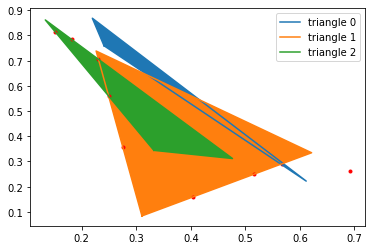

In [77]:
ax = plt.gca()
number_of_triangles = 3

x_points = np.random.rand(number_of_triangles, 3)
y_points = np.random.rand(number_of_triangles, 3)

x_points = np.array([np.append(cur_points, cur_points[0]) for cur_points in x_points])
y_points = np.array([np.append(cur_points, cur_points[0]) for cur_points in y_points])

index_first = np.random.randint(number_of_triangles)
index_second = np.random.randint(number_of_triangles)

while index_first == index_second:
    index_second = np.random.randint(number_of_triangles)

equations_left = np.array([[[y_points[index_first][i] - y_points[index_first][i + 1], \
                             x_points[index_first][i + 1] - x_points[index_first][i]] \
                            for i in range(3)], \
                           [[y_points[index_second][j] - y_points[index_second][j + 1], \
                             x_points[index_second][j + 1] - x_points[index_second][j]] \
                            for j in range(3)]])

equations_right = np.array([[x_points[index_first][i + 1] * y_points[index_first][i] - \
                             x_points[index_first][i] * y_points[index_first][i + 1] \
                            for i in range(3)], \
                           [x_points[index_second][j + 1] * y_points[index_second][j] - \
                             x_points[index_second][j] * y_points[index_second][j + 1] \
                            for j in range(3)]])

print(equations_left)
print(equations_right)

intersection_points = np.array([np.linalg.solve([equations_left[0][i], equations_left[1][j]], \
                                                [equations_right[0][i], equations_right[1][j]]) \
                                for i in range(3) for j in range(3)])

print(intersection_points)

for x, y in intersection_points:
    plt.plot(x, y, marker='o', markersize=3, color='red')

for index, (x_points, y_points) in enumerate(zip(x_points, y_points)):
    plt.plot(x_points, y_points, label=f'triangle {index}')
    ax.fill(x_points, y_points)
    
plt.legend()